This Jupyter Notebook is meant to create the data visualization for our 3D Conceptual Risk-Scoring  Matrix Model, using Matplotlib with Python. 

Source/Credits: https://likegeeks.com/3d-plotting-in-python/

## Importing Libraries

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating new content summary column (Don't need to run)

In [1]:
import pandas as pd
df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")


df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [2]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

edited_stopwords = stopwords
for i in stopwords.copy():
    if i == 'not':
        edited_stopwords.remove(i)
        
        
def preprocess(text):
    

    text = re.sub('\r\n', " ", str(text))
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'[^\w\s]', '', str(text))
#     text = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    token = word_tokenize(text)
    

    words = [t for t in token if t not in edited_stopwords]
    
#     return_text = " "
    
#     return_text = return_text.join(words)
    
    return words

In [3]:
df['new content summary'] = df['content summary'].apply(preprocess)

In [4]:
df.head(3)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed..."
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o..."
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo..."


# Creating Scores for the 3 Columns Tagged to Class Name (Don't need to run)

In [3]:
import pandas as pd

In [4]:
# df = pd.read_csv("Consolidated_News_Articles_With_Sentiment_Labels.csv")

df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")


df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [4]:
df['new_class_name'].unique()

array(['geophysical event', 'idiosyncratic', 'cyberattack',
       'Acute climatological event (cyclone)', 'pandemic',
       'Acute climatological event (droughts)', 'Economic Crisis',
       'Acute climatological event (flood)',
       'Acute climatological event (heat stress)', 'Man-Made Disaster',
       'Terrorism', 'Trade Dispute', 'Military Conflicts'], dtype=object)

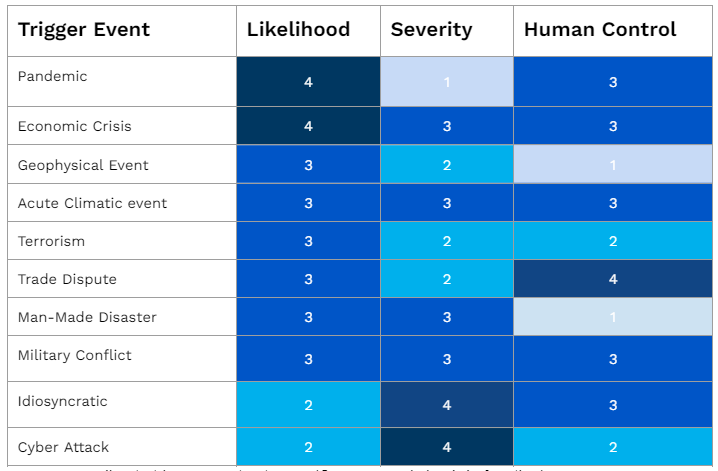

In [67]:
def create_likelihood_score(x):
    if x == 'idiosyncratic':
        return 2
    elif x == 'geophysical event':
        return 3
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 3
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 4
    elif x == 'pandemic':
        return 4
    elif x == 'Trade Dispute':
        return 3
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3
        

In [68]:
def create_severity_score(x):
    if x == 'idiosyncratic':
        return 4
    elif x == 'geophysical event':
        return 2
    elif x == 'cyberattack':
        return 4
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 1
    elif x == 'Trade Dispute':
        return 2
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3

In [8]:
def create_human_control_score(x):
    if x == 'idiosyncratic':
        return 3
    elif x == 'geophysical event':
        return 1
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 3
    elif x == 'Trade Dispute':
        return 4
    elif x == 'Man-Made Disaster':
        return 1
    else:
        return 3

In [9]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative


In [10]:
df['Likelihood Score'] = df['new_class_name'].apply(create_likelihood_score)

In [11]:
df["Likelihood Score"].value_counts()

3    9292
2    2437
4    2018
Name: Likelihood Score, dtype: int64

In [12]:
df['Severity Score'] = df['new_class_name'].apply(create_severity_score)

In [13]:
df['Human Control Score'] = df['new_class_name'].apply(create_human_control_score)

In [14]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1


# Editing the Severity Scores Codes (Don't need to run)

In [5]:
df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")

df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [47]:
for i in range(len(df)):
    severity_score = df["Severity Score"].loc[i]
    sentiment_label = df["sentiment label"].loc[i]
    compound_score = df["compound score"].loc[i]
    
#     print(compound_score)
    
    if sentiment_label == "negative":
#         print(compound_score)
        compound_score = -compound_score
        mid = compound_score + severity_score
#         print(f"{sentiment_label}: {test}")
        if test > 4:
            test = 4
        df["New Severity Score"].loc[i] = mid
    elif sentiment_label == "positive":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {test}")
        df["New Severity Score"].loc[i] = severity_score - compound_score 
    elif sentiment_label == "neutral":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {severity_score}")
        df["New Severity Score"].loc[i] = severity_score

        
    

In [48]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [52]:
df.to_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")

In [56]:
df['New Severity Score'].value_counts()

3.0000    1754
4.0000     615
2.0000     582
1.0000     337
3.7003      50
          ... 
2.6044       1
2.1317       1
4.7335       1
1.6240       1
3.7394       1
Name: New Severity Score, Length: 2373, dtype: int64

In [61]:
df['sentiment label'].value_counts()

negative    6817
positive    3642
neutral     3288
Name: sentiment label, dtype: int64

In [64]:
df['Severity Score'][df['sentiment label'] == 'neutral'].value_counts()

3    1754
4     615
2     582
1     337
Name: Severity Score, dtype: int64

# Editing the Human Control Score (Start Running Codes From Here)

In [34]:

import pandas as pd
import os
base_directory = "C:/Users/Darren/Documents/GitHub/FSX"

directory = os.chdir(f"{base_directory}/3D Plotting and Visualization")
files = os.listdir(".")
files

df = pd.read_csv("Improved_Consolidated_News_Articles_With_Sentiment_Labels.csv")


df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509


In [5]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed..."
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o..."
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo..."
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1,1.1775,"[new, delhi, reuters, himalayan, avalanche, tr..."
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1,2.9509,"[salt, lake, city, nytimes, four, backcountry,..."


In [6]:
df['new content summary'].head()

0    [mumbai, reuters, himalayan, avalanche, killed...
1    [zurich, reuters, one, person, killed, four, o...
2    [vienna, reuters, avalanche, area, austria, bo...
3    [new, delhi, reuters, himalayan, avalanche, tr...
4    [salt, lake, city, nytimes, four, backcountry,...
Name: new content summary, dtype: object

In [7]:
def cleaning_text(x):
    mid_string = x[1:-1]
    new_list = mid_string.split(', ')
    
    new_new_list = []
    for i in new_list:
        new_new_list.append(i[1:-1])
    
    return new_new_list

In [9]:
df['mid_working'] = df['new content summary']

In [10]:
df['mid_working'].head()

0    [mumbai, reuters, himalayan, avalanche, killed...
1    [zurich, reuters, one, person, killed, four, o...
2    [vienna, reuters, avalanche, area, austria, bo...
3    [new, delhi, reuters, himalayan, avalanche, tr...
4    [salt, lake, city, nytimes, four, backcountry,...
Name: mid_working, dtype: object

In [11]:
df['New Human Control Score'] = df['Human Control Score']

In [12]:
df.head(2)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,...,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary,mid_working,New Human Control Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...","[mumbai, reuters, himalayan, avalanche, killed...",1
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...","[zurich, reuters, one, person, killed, four, o...",1


# Dictionary of Values and List of Words to Alter Human Control Scores

In [14]:
decrease_human_control_words = {0.2:['foreseeable','anticipated','predictable','planned'], 0.3:["expected"]}

increase_human_control_words = {0.2:['unforeseeable','unexpected','unpredictable','unanticipated','unplanned']}

list_of_inverter_words = ['not']

In [16]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in decrease_human_control_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned = initial_human_control_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned = initial_human_control_score - key
                    word = t

            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{word} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['New Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in increase_human_control_words.items():
            if t in value:
                to_be_returned = initial_human_control_score + key
#                 print(to_be_returned)
                
                
    
            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
    


expected found at index 17
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 35
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 114
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
expected found at index 120
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
planned found at index 121
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 129
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
planned found at index 204
Intial Human Control Score: 1
Edited Human Control Score: 0.8
/
not expected
not expected found at index 222
Intial Human Control Score: 1
Edited Human Control Score: 1.3
/
expected found at index 263
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 275
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 363
Intial Human Control Score: 1
Edited Huma

Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2681
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2682
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2685
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2685
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2692
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2692
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 2692
Intial Human Control Score: 2.4000000000000004
Edited Human Control Score: 2.1000000000000005
/
expected found at index 2699
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 2700
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at

/
expected found at index 4091
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4091
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
anticipated found at index 4120
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
anticipated found at index 4121
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 4129
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 4131
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
not expected
not expected found at index 4131
Intial Human Control Score: 2.8
Edited Human Control Score: 3.0999999999999996
/
expected found at index 4147
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4149
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 4156
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected fou

expected found at index 5350
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5350
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 5367
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5367
Intial Human Control Score: 2.7
Edited Human Control Score: 2.4000000000000004
/
expected found at index 5375
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5378
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5391
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5410
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
planned found at index 5412
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 5437
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 5485
Intial H

/
expected found at index 6637
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6640
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6667
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6669
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6684
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6685
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6694
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6706
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6707
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6713
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 6718
Intial Human Control Score: 3
Edited Hu

Edited Human Control Score: 2.7
/
expected found at index 7540
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7549
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7551
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7578
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
not expected
not expected found at index 7586
Intial Human Control Score: 3
Edited Human Control Score: 3.3
/
anticipated found at index 7597
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
planned found at index 7623
Intial Human Control Score: 3
Edited Human Control Score: 2.8
/
expected found at index 7662
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7689
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at index 7698
Intial Human Control Score: 3
Edited Human Control Score: 2.7
/
expected found at

expected found at index 9747
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 9756
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
planned found at index 9757
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
expected found at index 9765
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 9776
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
expected found at index 9804
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 9819
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
expected found at index 9843
Intial Human Control Score: 2
Edited Human Control Score: 1.7
/
planned found at index 9858
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
planned found at index 9862
Intial Human Control Score: 2
Edited Human Control Score: 1.8
/
planned found at index 9862
Intial Human Control Score: 1.8
Edited Human Con

expected found at index 11261
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
expected found at index 11290
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
planned found at index 11296
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
planned found at index 11308
Intial Human Control Score: 4
Edited Human Control Score: 3.8
/
expected found at index 11319
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
expected found at index 11350
Intial Human Control Score: 4
Edited Human Control Score: 3.7
/
expected found at index 11370
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 11404
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 11468
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 11475
Intial Human Control Score: 1
Edited Human Control Score: 0.7
/
expected found at index 11475
Intial Human Control Score: 0.7


unexpected found at index 680
Intial Human Control Score: 2.8
Edited Human Control Score: 3.0
/
unpredictable found at index 738
Intial Human Control Score: 3.2
Edited Human Control Score: 3.4000000000000004
/
unexpected found at index 848
Intial Human Control Score: 3.2
Edited Human Control Score: 3.4000000000000004
/
unpredictable found at index 942
Intial Human Control Score: 2.2
Edited Human Control Score: 2.4000000000000004
/
unplanned found at index 1700
Intial Human Control Score: 2.2
Edited Human Control Score: 2.4000000000000004
/
unexpected found at index 2225
Intial Human Control Score: 3.2
Edited Human Control Score: 3.4000000000000004
/
unexpected found at index 2385
Intial Human Control Score: 3.4000000000000004
Edited Human Control Score: 3.6000000000000005
/
unexpected found at index 2385
Intial Human Control Score: 3.6000000000000005
Edited Human Control Score: 3.8000000000000007
/
unpredictable found at index 2448
Intial Human Control Score: 2.7
Edited Human Control S

In [63]:
df['New Human Control Score'].value_counts()

3.0    8064
2.0    2048
1.0    1892
4.0     747
2.7     504
2.8      89
2.4      70
1.8      65
0.7      56
1.7      41
3.2      39
3.7      31
3.8      23
0.8      18
2.1      10
1.4       6
2.6       6
2.5       5
2.9       5
2.2       4
1.2       4
3.4       3
3.6       3
3.5       3
0.4       2
1.8       2
1.6       2
1.5       2
0.6       2
0.5       1
2.4       1
Name: New Human Control Score, dtype: int64

In [66]:
df.head(2)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,mid_working,New Human Control Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...",1.0
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...",1.0


# Editing Likelihood Score

In [26]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,...,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary,mid_working,New Human Control Score,New Likelihood Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",...,-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...","[mumbai, reuters, himalayan, avalanche, killed...",1.0,3.0
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",...,-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...","[zurich, reuters, one, person, killed, four, o...",1.0,3.0
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",...,-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo...","[vienna, reuters, avalanche, area, austria, bo...",1.0,3.0
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",...,0.8225,positive,3,2,1,1.1775,"[new, delhi, reuters, himalayan, avalanche, tr...","[new, delhi, reuters, himalayan, avalanche, tr...",1.0,3.0
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",...,-0.9509,negative,3,2,1,2.9509,"[salt, lake, city, nytimes, four, backcountry,...","[salt, lake, city, nytimes, four, backcountry,...",1.0,3.0


In [27]:
df['New Likelihood Score'] = df['Likelihood Score']  -1

In [28]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,...,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score,New Severity Score,new content summary,mid_working,New Human Control Score,New Likelihood Score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",...,-0.7506,negative,3,2,1,2.7506,"[mumbai, reuters, himalayan, avalanche, killed...","[mumbai, reuters, himalayan, avalanche, killed...",1.0,2
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",...,-0.9665,negative,3,2,1,2.9665,"[zurich, reuters, one, person, killed, four, o...","[zurich, reuters, one, person, killed, four, o...",1.0,2
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",...,-0.9100,negative,3,2,1,2.9100,"[vienna, reuters, avalanche, area, austria, bo...","[vienna, reuters, avalanche, area, austria, bo...",1.0,2
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",...,0.8225,positive,3,2,1,1.1775,"[new, delhi, reuters, himalayan, avalanche, tr...","[new, delhi, reuters, himalayan, avalanche, tr...",1.0,2
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",...,-0.9509,negative,3,2,1,2.9509,"[salt, lake, city, nytimes, four, backcountry,...","[salt, lake, city, nytimes, four, backcountry,...",1.0,2


### Dictionary of Values and List of Words to Alter Likelihood Scores

In [18]:
decrease_likelihood_words = {0.2: ['improbable'], 0.3: ['unlikely']}
increase_likelihood_words = {0.2: ['likely','probable','cameron','highlands','johor'], 1:['malaysia']}
list_of_inverter_words = ['not']

In [30]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in decrease_likelihood_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned2 = initial_likelihood_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned2 = initial_likelihood_score - key
                    word = t
                    
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['New Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in increase_likelihood_words.items():
            if t in value:
                
                position = list_of_words.index(t)
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                    to_be_returned2 = initial_likelihood_score - key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                    
                else:
                    to_be_returned2 = initial_likelihood_score + key
                    word = t
            
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
    


unlikely found at index 19
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 20
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 172
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 309
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 312
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 578
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 580
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 782
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 812
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 831
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 967
Intial Likelihood Score: 2
Edited Likelihood Score: 1.7
/
unlikely found at index 1639
Intial Likelihood Score: 2


/
unlikely found at index 12815
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
unlikely found at index 13145
Intial Likelihood Score: 3
Edited Likelihood Score: 2.7
/
likely found at index 25
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 31
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 109
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 142
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 170
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 171
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 199
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 268
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 271
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 291
Intial Likelihood Score:

Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1694
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1711
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1723
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1750
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1787
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1799
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1804
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1807
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1811
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1840
Intial Likelihood Score: 1.0
Edited Likelihood Score: 1.2
/
likely found at index 1855
Intial Likelihood Score: 1.0
Edited Likelih

malaysia found at index 2881
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 2881
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
malaysia found at index 2882
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 2882
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
johor found at index 2882
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
likely found at index 2884
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2914
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
cameron found at index 2917
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2920
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2922
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 2924
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 2948
Intial L

likely found at index 4137
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4137
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
malaysia found at index 4154
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 4154
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 4155
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 4155
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
likely found at index 4196
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4246
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4254
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4286
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 4287
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
not likely
likely fo

Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5305
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 5338
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
likely found at index 5343
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5345
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5347
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
likely found at index 5359
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.2
/
malaysia found at index 5398
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 5398
Intial Likelihood Score: 3.5
Edited Likelihood Score: 4.0
/
malaysia found at index 5398
Intial Likelihood Score: 4.0
Edited Likelihood Score: 4
/
malaysia found at index 5398
Intial Likelihood Score: 4
Edited Likelihood Score: 4
/
likely found at index 5418
Intial Likelihood Score: 3.0
Edited Lik

malaysia found at index 6283
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6286
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6292
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6294
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6295
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6295
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 6297
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 6297
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 6297
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 6298
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
highlands found at index 6317
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at inde

Edited Likelihood Score: 2.5
/
johor found at index 6988
Intial Likelihood Score: 2.5
Edited Likelihood Score: 2.7
/
likely found at index 6991
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 6996
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
johor found at index 6999
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
johor found at index 6999
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
johor found at index 6999
Intial Likelihood Score: 2.4000000000000004
Edited Likelihood Score: 2.6000000000000005
/
johor found at index 6999
Intial Likelihood Score: 2.6000000000000005
Edited Likelihood Score: 2.8000000000000007
/
johor found at index 6999
Intial Likelihood Score: 2.8000000000000007
Edited Likelihood Score: 3.000000000000001
/
highlands found at index 7045
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 7046
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.

/
likely found at index 8290
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8292
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8311
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8312
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8329
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 8329
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 8351
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 8356
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 8356
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 8364
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
likely found at index 8376
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at inde

malaysia found at index 9974
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 9974
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
likely found at index 9980
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 9996
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 9997
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 9997
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
malaysia found at index 9997
Intial Likelihood Score: 3.0
Edited Likelihood Score: 3.5
/
malaysia found at index 10007
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 10022
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
likely found at index 10022
Intial Likelihood Score: 2.5
Edited Likelihood Score: 2.7
/
likely found at index 10036
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 1

likely found at index 11210
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11217
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11217
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
likely found at index 11217
Intial Likelihood Score: 2.4000000000000004
Edited Likelihood Score: 2.6000000000000005
/
likely found at index 11239
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11260
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 11285
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
likely found at index 11300
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11313
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11316
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 11331
Intial Likelihood Score: 2.0
Edited Likelihoo

/
likely found at index 13124
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 13131
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
likely found at index 13150
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 13167
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.5
/
malaysia found at index 13167
Intial Likelihood Score: 2.5
Edited Likelihood Score: 3.0
/
likely found at index 13216
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 13263
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 13299
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 13334
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 13352
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
likely found at index 13357
Intial Likelihood Score: 2.0
Edited Likelihood Score: 2.2
/
malaysia found at index 

In [31]:
df['New Likelihood Score'].value_counts()

2.0    8634
1.0    2301
3.0    1884
2.2     357
2.5     124
3.2      98
1.2      70
2.7      66
3.5      34
1.5      31
2.4      26
4.0      19
3.7      17
1.7      12
2.6      10
3.4      10
2.9       9
2.8       7
2.8       7
1.4       6
1.8       5
3.0       4
3.9       4
3.1       4
3.3       2
1.8       2
1.6       1
3.8       1
3.6       1
3.2       1
3.3       1
Name: New Likelihood Score, dtype: int64

# Creating and Plotting The Cube

<IPython.core.display.Javascript object>


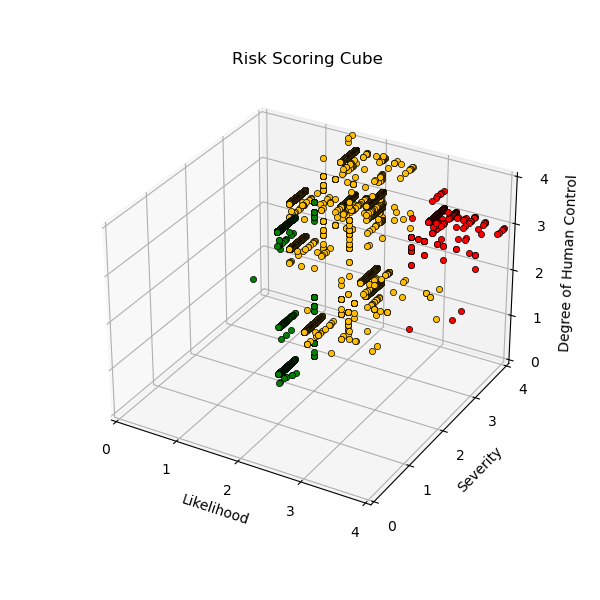

In [32]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])

plt.show()

In [23]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])

plt.show()

NameError: name 'plt' is not defined